In [37]:
import sys
sys.path.append('../')  
import pandas as pd
import matplotlib.pyplot as plt
import time
import plotly.express as px
from plotly.subplots import make_subplots

from src.data.collector.brasil_bitcoin import LoadBrasilBitcoin
from src.data.collector.bitso_bitcoin import LoadBitsoBitcoin
from src.data.collector.bitypreco_bitcoin import LoadBityBitcoin
from src.data.collector.bitcoin_to_you import LoadBitcoinToYou
from src.data.collector.mercado_bitcoin import LoadMercadoBitcoin
from src.data.collector.ripio_bitcoin import LoadRipioTrade

def change_types(data):
        data['preco'] = data['preco'].astype(float)
        data['quantidade'] = data['quantidade'].astype(float)
        return data

delay = 0.1
price_range = 50  # Price range for analysis


lbb = LoadBrasilBitcoin()
lbitso = LoadBitsoBitcoin()
lbity = LoadBityBitcoin()
ltyou = LoadBitcoinToYou()
lmerc = LoadMercadoBitcoin()
lripio = LoadRipioTrade()


ob_brasil_bitcoin = lbb.get_brasil_bitcoin_orderbook()
ob_bitso_bitcoin = lbitso.get_bitso_bitcoin_orderbook()
ob_bity_bitcoin = lbity.get_bity_bitcoin_orderbook()
ob_to_you = ltyou.get_btou_bitcoin_orderbook()
ob_mercado_bit = lmerc.get_mercado_bitcoin_orderbook()
ob_ripio = lripio.get_ripio_bitcoin_orderbook()

orderbook = pd.concat([ob_brasil_bitcoin, ob_bity_bitcoin,  ob_mercado_bit, ob_ripio], ignore_index=True)

#ob_bitso_bitcoin, ob_to_you,

#orderbook = pd.concat([ob_mercado_bit, ob_bity_bitcoin])
orderbook = change_types(orderbook)

orderbook_compra = orderbook.loc[orderbook['compra_venda'] == 'compra'].sort_values(by=['preco', 'empresa'], ascending=False).reset_index(drop=True)
orderbook_venda = orderbook.loc[orderbook['compra_venda'] == 'venda'].sort_values(by=['preco', 'empresa'], ascending=True).reset_index(drop=True)


In [38]:
import pandas as pd

def calcular_quantidade_ordens(orderbook, percentual):
    dict_ordens = {
        'empresa': [],
        'qtd_ordens': []
    }
    empresas = orderbook['empresa'].unique()

    for empresa in empresas:
        ob = orderbook.loc[orderbook['empresa'] == empresa]
        
        mean_price = ob['preco'].mean()
        top_price = mean_price + (mean_price * (percentual/100) )
        bottom_price = mean_price - (mean_price * (percentual/100) )
        qtd_ordens = ob.loc[(ob['preco'] > bottom_price) & (ob['preco'] < top_price)].shape[0]

        # Adicionar dados ao dicionário
        dict_ordens['empresa'].append(empresa)
        dict_ordens['qtd_ordens'].append(qtd_ordens)
        

    df_ordens = pd.DataFrame(dict_ordens)
    return df_ordens

In [39]:
var_price = 5

df_qtd_compra = calcular_quantidade_ordens(orderbook_compra, var_price).sort_values('qtd_ordens', ascending=True)
df_qtd_venda = calcular_quantidade_ordens(orderbook_venda, var_price).sort_values('qtd_ordens', ascending=False)


In [40]:
compra_qtd = px.bar(data_frame=df_qtd_compra, x='qtd_ordens', y='empresa', color='empresa', title='Quantidade de necessária para mudar o preço em 1 %.', width=50000, height=50000, text='qtd_ordens')
venda_qtd = px.bar(data_frame=df_qtd_venda, x='qtd_ordens', y='empresa', color='empresa', title='Quantidade de necessária para mudar o preço em 1 %.', width=50000, height=50000, labels=None, text='qtd_ordens')


compra_qtd.update_traces(texttemplate='%{text:.2s}')
venda_qtd.update_traces(texttemplate='%{text:.2s}')

fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.002)

empresas = orderbook_compra['empresa'].unique()
n = len(empresas)

for i in range(n):
    fig.add_trace(compra_qtd.data[i], row=1, col=1)
    fig.add_trace(venda_qtd.data[i], row=1, col=2)

fig.update_layout(xaxis=dict(autorange='reversed'),
                   showlegend=False,
                   margin=dict(l=10, r=10, t=30, b=30),
                   yaxis2=dict(visible=False),
                   bargap=0
                  )
fig

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Defina os temas de cor
cores_compra = 'rgb(31, 119, 180)'
cores_venda = 'rgb(255, 127, 14)'

compra_qtd = px.bar(data_frame=df_qtd_compra, x='qtd_ordens', y='empresa', color='empresa', title='Quantidade de necessária para mudar o preço em 1 %.', width=500, height=500, text='qtd_ordens')
venda_qtd = px.bar(data_frame=df_qtd_venda, x='qtd_ordens', y='empresa', color='empresa', title='Quantidade de necessária para mudar o preço em 1 %.', width=500, height=500, labels=None, text='qtd_ordens')

# Atualize as configurações de estilo
compra_qtd.update_traces(texttemplate='%{text:.2s}', textposition='inside')
venda_qtd.update_traces(texttemplate='%{text:.2s}', textposition='inside')

fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.02)

empresas = orderbook_compra['empresa'].unique()
n = len(empresas)

for i in range(n):
    fig.add_trace(compra_qtd.data[i], row=1, col=1)
    fig.add_trace(venda_qtd.data[i], row=1, col=2)

fig.update_layout(xaxis=dict(autorange='reversed'),
                   showlegend=False,
                   margin=dict(l=10, r=10, t=30, b=30),
                   yaxis2=dict(visible=False),
                   bargap=0,
                   plot_bgcolor='white',
                   paper_bgcolor='white',
                   font=dict(family="Arial, sans-serif", size=12, color="black"),
                   title=dict(font=dict(size=16)),
                   hoverlabel=dict(font=dict(size=12))
                  )

fig.show()


In [42]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Defina os temas de cor
cores_compra = 'rgb(31, 119, 180)'
cores_venda = 'rgb(255, 127, 14)'

compra_qtd = px.bar(data_frame=df_qtd_compra, x='qtd_ordens', y='empresa', color='empresa', title='Quantidade de necessária para mudar o preço em 1 %.', width=500, height=500, text='qtd_ordens')
venda_qtd = px.bar(data_frame=df_qtd_venda, x='qtd_ordens', y='empresa', color='empresa', title='Quantidade de necessária para mudar o preço em 1 %.', width=500, height=500, labels=None, text='qtd_ordens')

# Atualize as configurações de estilo
compra_qtd.update_traces(marker=dict(color=cores_compra, line=dict(width=0.1)), texttemplate='%{text:.2s}', textposition='inside')
venda_qtd.update_traces(marker=dict(color=cores_venda, line=dict(width=0.1)), texttemplate='%{text:.2s}', textposition='inside')

fig = make_subplots(rows=1, cols=2, horizontal_spacing=0.02)

empresas = orderbook_compra['empresa'].unique()
n = len(empresas)

for i in range(n):
    fig.add_trace(compra_qtd.data[i], row=1, col=1)
    fig.add_trace(venda_qtd.data[i], row=1, col=2)

fig.update_layout(xaxis=dict(autorange='reversed'),
                   showlegend=False,
                   margin=dict(l=10, r=10, t=30, b=30),
                   yaxis2=dict(visible=False),
                   bargap=0,
                   plot_bgcolor='white',
                   paper_bgcolor='white',
                   font=dict(family="Arial, sans-serif", size=12, color="black"),
                   title=dict(font=dict(size=16)),
                   hoverlabel=dict(font=dict(size=12))
                  )

fig.show()


NameError: name 'pyplot' is not defined

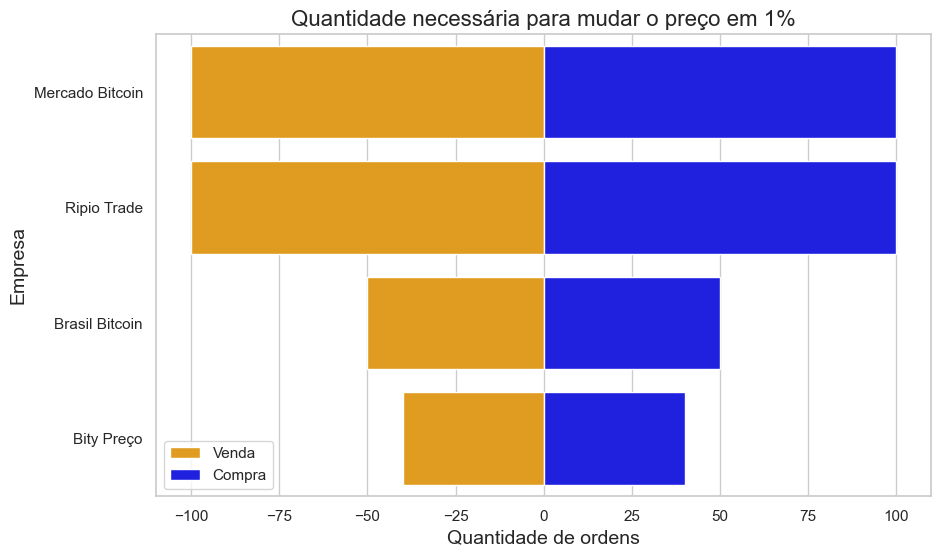

In [49]:
import seaborn as sns
sns.set(style="whitegrid")

# Criando a figura
plt.figure(figsize=(10, 6))

# Plotando os gráficos de barras de venda
sns.barplot(x=-df_qtd_venda['qtd_ordens'], y='empresa', data=df_qtd_venda, color='orange', label='Venda')

# Plotando os gráficos de barras de compra
sns.barplot(x=df_qtd_compra['qtd_ordens'], y='empresa', data=df_qtd_compra, color='blue', label='Compra')

# Adicionando legenda
plt.legend()

# Configurações adicionais
plt.title('Quantidade necessária para mudar o preço em 1%', fontsize=16)
plt.xlabel('Quantidade de ordens', fontsize=14)
plt.ylabel('Empresa', fontsize=14)

pyplot()

C:\Users\thale\AppData\Local\Temp\ipykernel_25440\1263594371.py:16: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




AttributeError: Rectangle.set() got an unexpected keyword argument 'text'

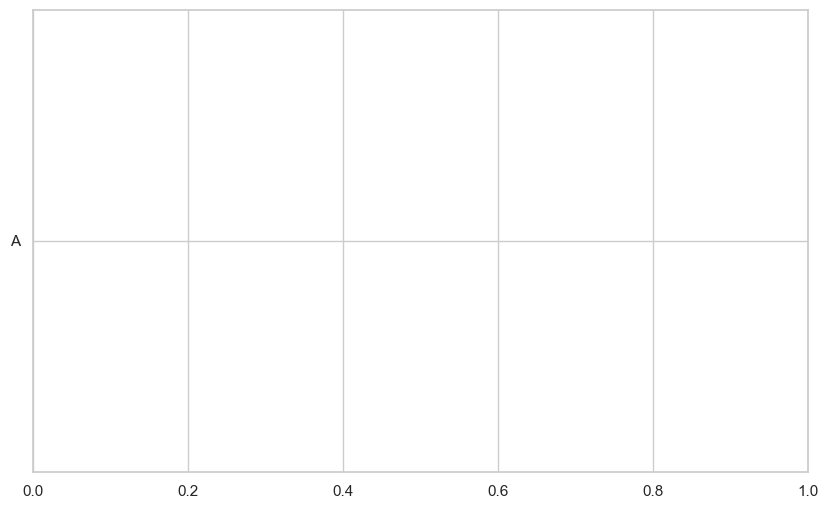

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Simulando os dataframes df_qtd_compra e df_qtd_venda
df_qtd_compra = pd.DataFrame({'empresa': ['A', 'B', 'C'], 'qtd_ordens': [10, 20, 15]})
df_qtd_venda = pd.DataFrame({'empresa': ['A', 'B', 'C'], 'qtd_ordens': [15, 25, 10]})

# Definindo o estilo do seaborn
sns.set(style="whitegrid")

# Criando a figura
plt.figure(figsize=(10, 6))

# Plotando os gráficos de barras de venda
sns.barplot(x=-df_qtd_venda['qtd_ordens'], y='empresa', data=df_qtd_venda, color='orange', label='Venda',
            ci=None, text=-df_qtd_venda['qtd_ordens'])

# Plotando os gráficos de barras de compra
sns.barplot(x=df_qtd_compra['qtd_ordens'], y='empresa', data=df_qtd_compra, color='blue', label='Compra',
            ci=None, text=df_qtd_compra['qtd_ordens'])

# Adicionando legenda
plt.legend()

# Configurações adicionais
plt.title('Quantidade necessária para mudar o preço em 1%', fontsize=16)
plt.xlabel('Quantidade de ordens', fontsize=14)
plt.ylabel('Empresa', fontsize=14)

plt.tight_layout()

plt.show()
